In [1]:
#%% Import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nets_predict.classes.hmm import HiddenMarkovModelClass
from nets_predict.classes.partial_correlation import PartialCorrelationClass
import matplotlib.cm as cm
import pandas as pd

HMMClass = HiddenMarkovModelClass()
PartialCorrClass = PartialCorrelationClass()


/users/win-fmrib-analysis/psz102/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# set parameters for script
n_chunk = 4
n_ICs = 25
n_edge = int((n_ICs * (n_ICs - 1))/2)

In [3]:
# set project directories
proj_dir = '/gpfs3/well/win-fmrib-analysis/users/psz102/nets-predict/nets_predict'
load_dir = f"{proj_dir}/results/ICA_{n_ICs}/edge_prediction/{n_chunk}_chunks/combined"

# decide which featured to examine
feature_prediction_dict = dict()
feature_prediction_dict['static_icov_icov'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_static_states_0_model_mean_True.npz")
feature_prediction_dict['actual_icov_icov'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_actual.npz")
feature_prediction_dict['actual_icov_cov'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_cov_chunks_{n_chunk}_features_used_actual.npz")
feature_prediction_dict['actual_cov_icov'] = np.load(f"{load_dir}/edge_prediction_all_nm_cov_pm_icov_chunks_{n_chunk}_features_used_actual.npz")
feature_prediction_dict['actual_cov_cov'] = np.load(f"{load_dir}/edge_prediction_all_nm_cov_pm_cov_chunks_{n_chunk}_features_used_actual.npz")


In [4]:
# load ground truth matrix
ground_truth_dir = f"{proj_dir}/results/ICA_{n_ICs}/ground_truth"
ground_truth_matrix = np.load(f"{ground_truth_dir}/ground_truth_partial_mean_4_sessions.npy")

# extract upper diagonal (excluding main diagonal) 
ground_truth_icov_reshape = PartialCorrClass.extract_upper_off_main_diag(ground_truth_matrix)

# take mean ground truth across subjects
ground_truth_icov_reshape_mean = np.mean(ground_truth_icov_reshape,axis=0)


In [5]:
print(*feature_prediction_dict['static_icov_icov'])
print(*feature_prediction_dict['actual_icov_icov'])
print(feature_prediction_dict['static_icov_icov']['predict_y'].shape) # prediction
print(feature_prediction_dict['actual_icov_icov']['netmats_flatten'].shape) # prediction
print(ground_truth_icov_reshape.shape) # target




alpha l1_ratio corr_y predict_y beta accuracy_per_edge
accuracy_per_edge netmats_flatten
(4, 1003, 300)
(4, 1003, 300)
(1003, 300)


In [6]:
# Get the shapes
prediction_shape = feature_prediction_dict['static_icov_icov']['predict_y'].shape
target_shape = ground_truth_icov_reshape.shape

# Initialize an array to store the MSE values
mse_values = np.zeros((prediction_shape[0], prediction_shape[2]))

# Iterate over each chunk
for i in range(prediction_shape[0]):
    # Calculate MSE for each target-prediction pair
    mse_values[i] = np.mean(np.square(ground_truth_icov_reshape - feature_prediction_dict['static_icov_icov']['predict_y'][i]), axis=0)

# Print the MSE values for each chunk
for i, mse_chunk in enumerate(mse_values):
    print(f"Chunk {i+1} MSE values:")
    print(mse_chunk)


Chunk 1 MSE values:
[0.4719933  1.67401839 1.5424279  0.45561591 0.53261445 1.91426681
 0.66618572 0.47144919 0.62145747 0.57936207 0.53175751 0.62821832
 0.986944   2.56039218 0.51840285 0.56269186 0.55691283 0.53342036
 0.68004685 0.50416239 0.57491517 0.46110442 0.54764517 0.33847221
 0.34743199 0.49003351 0.72350488 0.86000961 0.47507259 0.76544808
 0.59485319 0.60457427 1.0246286  0.96108516 0.38523164 0.51984186
 0.58329356 0.5480211  0.85974995 0.85486386 0.84858695 0.71585373
 0.45916018 0.44782594 0.35485591 0.36914277 0.26400967 1.47507631
 0.31752357 0.35318033 1.58688992 0.57883307 0.53492033 0.55437311
 0.41212037 0.35082491 0.69735948 0.70501595 1.29812391 0.31507683
 0.46978817 0.38245207 0.34513491 0.51722413 0.27946764 0.40724287
 0.49695127 0.32120627 0.36484463 0.62613935 0.69369924 2.04837806
 1.13016065 0.69823843 1.34182298 0.6991708  0.70042259 0.82033953
 1.054019   0.96479136 0.47867891 0.76232993 0.72021847 0.56071168
 0.60692571 0.4472413  0.51943344 0.502716

0
1
2
3
0
1
2
3


/tmp/ipykernel_216479/231818104.py:41: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Group', y='MSE', hue='Dataset', data=df_combined_corr, palette=colors)


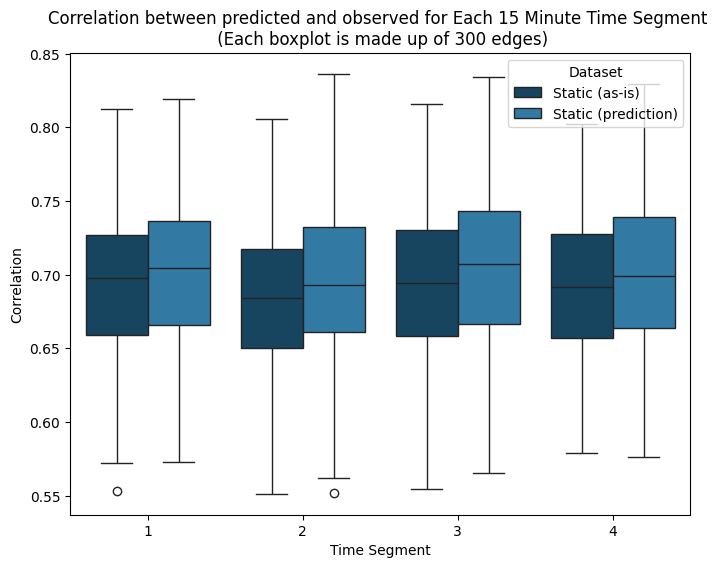

In [7]:
# Get the shapes for static_icov_icov and actual_icov_icov
prediction_shape_static = feature_prediction_dict['static_icov_icov']['predict_y'].shape
prediction_shape_actual = feature_prediction_dict['actual_icov_icov']['netmats_flatten'].shape

# Initialize arrays to store the MSE values
corr_values_static = np.zeros((prediction_shape_static[0], prediction_shape_static[2]))
corr_values_actual = np.zeros((prediction_shape_actual[0], prediction_shape_actual[2]))

# Calculate MSE values for static_icov_icov
for i in range(prediction_shape_static[0]):
    print(i)
    for j in range(prediction_shape_static[2]):
        corr_values_static[i, j] = np.corrcoef(ground_truth_icov_reshape[:, j], feature_prediction_dict['static_icov_icov']['predict_y'][i][:, j])[0,1]

# Calculate MSE values for actual_icov_icov
for i in range(prediction_shape_actual[0]):
    print(i)
    for j in range(prediction_shape_actual[2]):
        corr_values_actual[i, j] = np.corrcoef(ground_truth_icov_reshape[:, j], feature_prediction_dict['actual_icov_icov']['netmats_flatten'][i][:, j])[0,1]

# Create lists to hold MSE values for each chunk for both datasets
corr_values_list_static = [corr_values_static[i] for i in range(corr_values_static.shape[0])]
corr_values_list_actual = [corr_values_actual[i] for i in range(corr_values_actual.shape[0])]

# Create dataframes with the MSE data and group names for both datasets
df_corr_static = pd.DataFrame({'Group': np.repeat(range(1, 5), corr_values_static.shape[1]),
                              'MSE': np.concatenate(corr_values_list_static),
                              'Dataset': 'Static (prediction)'})
df_corr_actual = pd.DataFrame({'Group': np.repeat(range(1, 5), corr_values_actual.shape[1]),
                              'MSE': np.concatenate(corr_values_list_actual),
                              'Dataset': 'Static (as-is)'})

# Concatenate the dataframes for both datasets
df_combined_corr = pd.concat([df_corr_actual, df_corr_static], ignore_index=True)

# Set the colors for the boxplot
colors = ['#0B486B', '#1f7fb7', '#38adc3', '#6bc6bd']

# Create the grouped boxplot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Group', y='MSE', hue='Dataset', data=df_combined_corr, palette=colors)

# Set the x-axis and y-axis labels
plt.xlabel('Time Segment')
plt.ylabel('Correlation')

# Set the title
plt.title("Correlation between predicted and observed for Each 15 Minute Time Segment \n (Each boxplot is made up of 300 edges)")

# Show the legend
plt.legend(title='Dataset')

# Show the plot
plt.show()

/tmp/ipykernel_216479/3767033632.py:37: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Group', y='MSE', hue='Dataset', data=df_combined_mse, palette=colors)


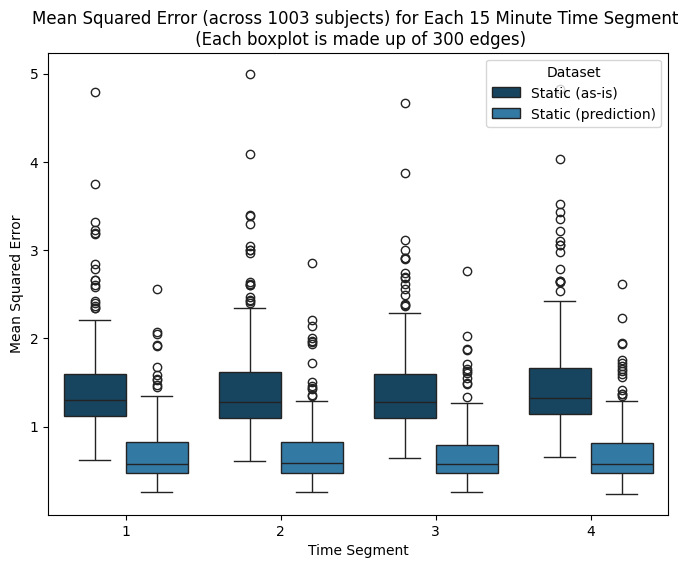

In [8]:
# Get the shapes for static_icov_icov and actual_icov_icov
prediction_shape_static = feature_prediction_dict['static_icov_icov']['predict_y'].shape
prediction_shape_actual = feature_prediction_dict['actual_icov_icov']['netmats_flatten'].shape

# Initialize arrays to store the MSE values
mse_values_static = np.zeros((prediction_shape_static[0], prediction_shape_static[2]))
mse_values_actual = np.zeros((prediction_shape_actual[0], prediction_shape_actual[2]))

# Calculate MSE values for static_icov_icov
for i in range(prediction_shape_static[0]):
    mse_values_static[i] = np.mean(np.square(ground_truth_icov_reshape - feature_prediction_dict['static_icov_icov']['predict_y'][i]), axis=0)

# Calculate MSE values for actual_icov_icov
for i in range(prediction_shape_actual[0]):
    mse_values_actual[i] = np.mean(np.square(ground_truth_icov_reshape - feature_prediction_dict['actual_icov_icov']['netmats_flatten'][i]), axis=0)

# Create lists to hold MSE values for each chunk for both datasets
mse_values_list_static = [mse_values_static[i] for i in range(mse_values_static.shape[0])]
mse_values_list_actual = [mse_values_actual[i] for i in range(mse_values_actual.shape[0])]

# Create dataframes with the MSE data and group names for both datasets
df_mse_static = pd.DataFrame({'Group': np.repeat(range(1, 5), mse_values_static.shape[1]),
                              'MSE': np.concatenate(mse_values_list_static),
                              'Dataset': 'Static (prediction)'})
df_mse_actual = pd.DataFrame({'Group': np.repeat(range(1, 5), mse_values_actual.shape[1]),
                              'MSE': np.concatenate(mse_values_list_actual),
                              'Dataset': 'Static (as-is)'})

# Concatenate the dataframes for both datasets
df_combined_mse = pd.concat([df_mse_actual, df_mse_static], ignore_index=True)

# Set the colors for the boxplot
colors = ['#0B486B', '#1f7fb7', '#38adc3', '#6bc6bd']

# Create the grouped boxplot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Group', y='MSE', hue='Dataset', data=df_combined_mse, palette=colors)

# Set the x-axis and y-axis labels
plt.xlabel('Time Segment')
plt.ylabel('Mean Squared Error')

# Set the title
plt.title("Mean Squared Error (across 1003 subjects) for Each 15 Minute Time Segment \n (Each boxplot is made up of 300 edges)")

# Show the legend
plt.legend(title='Dataset')

# Show the plot
plt.show()


In [9]:
# Get the shapes for static_icov_icov and actual_icov_icov
prediction_shape_static = feature_prediction_dict['static_icov_icov']['predict_y'].shape
prediction_shape_actual = feature_prediction_dict['actual_icov_icov']['netmats_flatten'].shape

# Initialize arrays to store the MSE values
mse_values_static = np.zeros((prediction_shape_static[0], prediction_shape_static[2]))
mse_values_actual = np.zeros((prediction_shape_actual[0], prediction_shape_actual[2]))

# Calculate MSE values for static_icov_icov
for i in range(prediction_shape_static[0]):
    mse_values_static[i] = np.mean(np.square(ground_truth_icov_reshape - feature_prediction_dict['static_icov_icov']['predict_y'][i]), axis=0)

# Calculate MSE values for actual_icov_icov
for i in range(prediction_shape_actual[0]):
    mse_values_actual[i] = np.mean(np.square(ground_truth_icov_reshape - feature_prediction_dict['actual_icov_icov']['netmats_flatten'][i]), axis=0)

# Create lists to hold MSE values for each chunk for both datasets
mse_values_list_static = [mse_values_static[i] for i in range(mse_values_static.shape[0])]
mse_values_list_actual = [mse_values_actual[i] for i in range(mse_values_actual.shape[0])]

# Calculate the mean MSE values across 300 values for each chunk
mean_mse_static = np.mean(mse_values_static, axis=1)
mean_mse_actual = np.mean(mse_values_actual, axis=1)

# Create a dataframe with the mean MSE data and group names for both datasets
df_mean_mse_static = pd.DataFrame({'Chunk': range(1, 5), 'Mean MSE': mean_mse_static, 'Netmats': 'Static (prediction)'})
df_mean_mse_actual = pd.DataFrame({'Chunk': range(1, 5), 'Mean MSE': mean_mse_actual, 'Netmats': 'Static (as-is)'})

# Concatenate the dataframes for both datasets
df_combined_mean_mse = pd.concat([df_mean_mse_actual, df_mean_mse_static], ignore_index=True)


In [10]:
# Calculate the mean correlation values across 300 values for each chunk
mean_correlation_static = np.mean(corr_values_static, axis=1)
mean_correlation_actual = np.mean(corr_values_actual, axis=1) 

# Create dataframes with the mean correlation data and group names for both datasets
df_mean_correlation_static = pd.DataFrame({'Chunk': range(1, 5), 'Mean Correlation': mean_correlation_static, 'Netmats': 'Static (prediction)'})
df_mean_correlation_actual = pd.DataFrame({'Chunk': range(1, 5), 'Mean Correlation': mean_correlation_actual, 'Netmats': 'Static (as-is)'})

# Concatenate the dataframes for both datasets
df_combined_mean_correlation = pd.concat([df_mean_correlation_actual, df_mean_correlation_static])


In [11]:
print(df_combined_mean_correlation)



   Chunk  Mean Correlation              Netmats
0      1          0.693652       Static (as-is)
1      2          0.685405       Static (as-is)
2      3          0.695896       Static (as-is)
3      4          0.692832       Static (as-is)
0      1          0.701791  Static (prediction)
1      2          0.695861  Static (prediction)
2      3          0.704724  Static (prediction)
3      4          0.700706  Static (prediction)


/tmp/ipykernel_216479/2218574845.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('twilight_shifted')


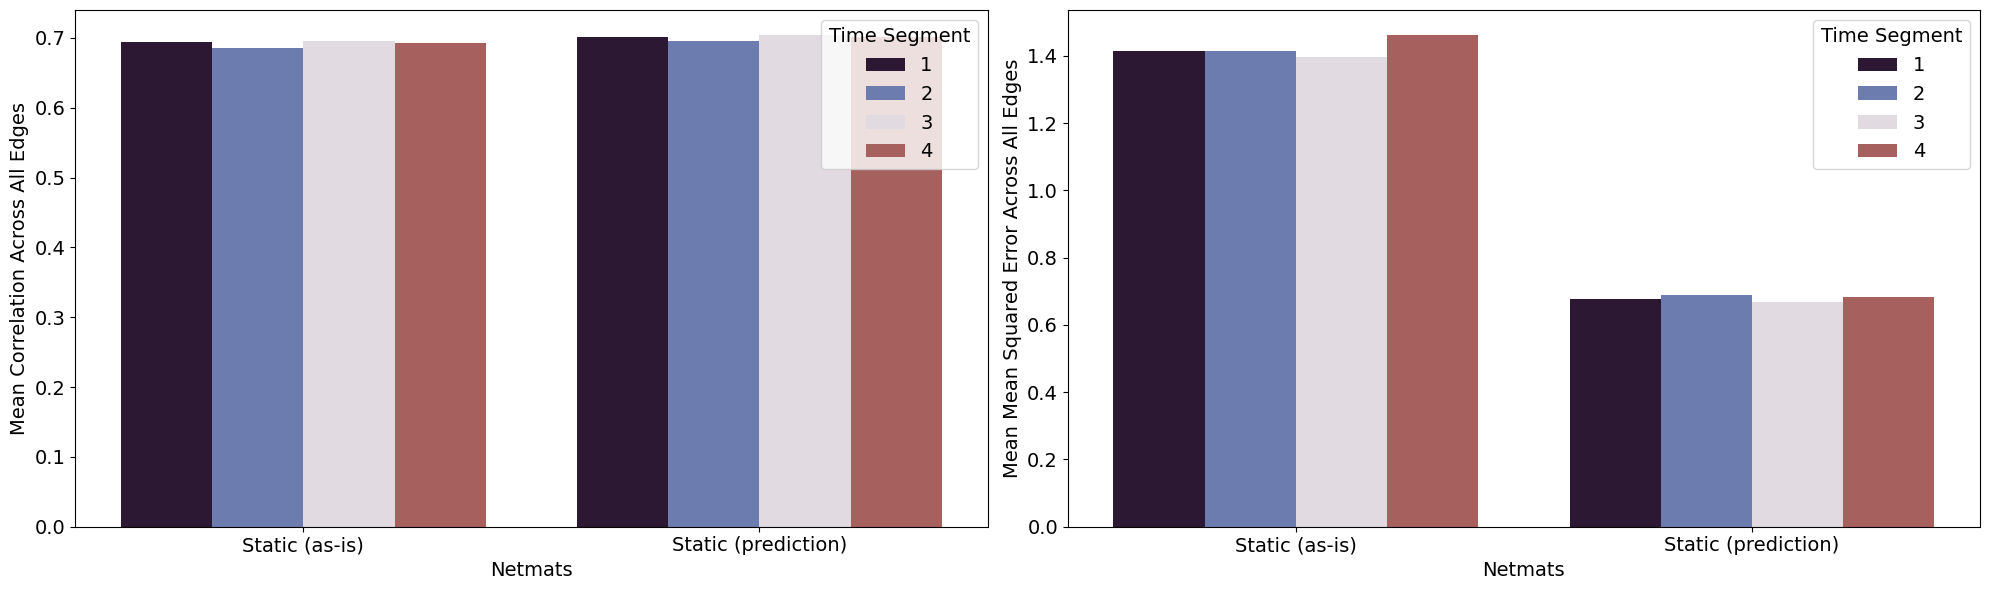

In [12]:
# Set the colors for the bar chart
cmap = plt.cm.get_cmap('twilight_shifted')
colors = [cmap(i / 4) for i in range(4)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot Mean Correlation
sns.barplot(x='Netmats', y='Mean Correlation', hue='Chunk', data=df_combined_mean_correlation, palette=colors, ax=axes[0])
axes[0].set_xlabel('Netmats', fontsize=14)
axes[0].set_ylabel('Mean Correlation Across All Edges', fontsize=14)
#axes[0].set_title('Mean Correlation between Predicted and Observed for Each Chunk', fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].legend(title='Time Segment', fontsize=14, title_fontsize=14)

# Plot Mean Squared Error
sns.barplot(x='Netmats', y='Mean MSE', hue='Chunk', data=df_combined_mean_mse, palette=colors, ax=axes[1])
axes[1].set_xlabel('Netmats', fontsize=14)
axes[1].set_ylabel('Mean Mean Squared Error Across All Edges', fontsize=14)
#axes[1].set_title('Mean Squared Error for Each Chunk', fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].legend(title='Time Segment', fontsize=14, title_fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

5
static_icov_icov actual_icov_icov actual_icov_cov actual_cov_icov actual_cov_cov
alpha l1_ratio corr_y predict_y beta accuracy_per_edge


/tmp/ipykernel_216479/2383723926.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('twilight_shifted')


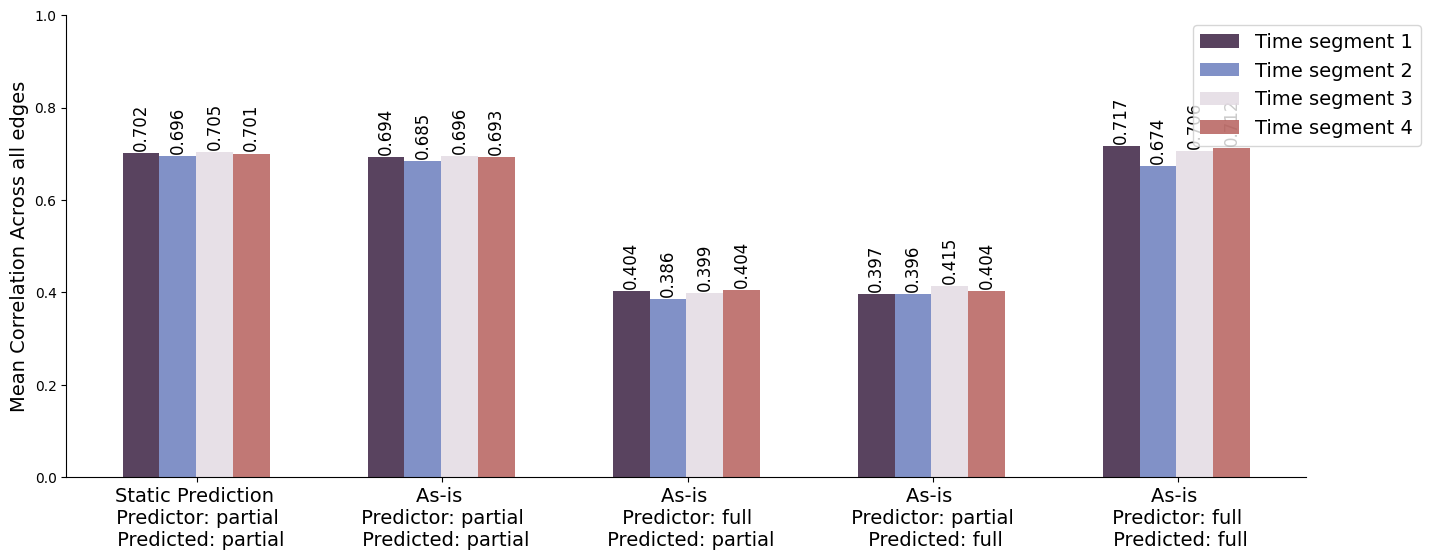

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

###################### let's compare partial correlations with full covariances (predictOR and predictED) ######################

# note how many dynamic features are being used and print what they are
n_feat_type = len(feature_prediction_dict) 
print(n_feat_type)
print(*feature_prediction_dict)

# let's combine the prediction accuracies for each hmm features into a combined array
hmm_features_accuracy = np.zeros((n_feat_type, n_chunk, n_edge))
feat_num = 0
labels = []
for key, value in feature_prediction_dict.items():
    hmm_features_accuracy[feat_num,:,:] = value['accuracy_per_edge']
    labels.append(key) # create labels for plot
    feat_num += 1


print(*feature_prediction_dict['static_icov_icov'])

# if we want to remove nan subjects see commented code at end of script

# Here we split up the accuracy of the chunks for using partial correlations to predict partial correlations
# Create a colormap with a smooth transition of colors
cmap = cm.get_cmap('twilight_shifted')

# Define the number of colors needed
num_colors = n_chunk

# Get a list of colors from the colormap
colors = [cmap(i / num_colors) for i in range(num_colors)]

# Create a new figure for the grouped bar chart with a larger size
fig, ax = plt.subplots(figsize=(16, 6))

# Set bar width, group offset, and x-positions of bars
x = np.arange(len(labels))
if n_chunk == 4:
    bar_width = 0.15
    group_offset = (len(labels)) * bar_width
elif n_chunk == 12:
    bar_width = 0.05
    group_offset = (len(labels) + 8) * bar_width

# Iterate over the traits
for i in range(n_chunk):
    chunk_plot = hmm_features_accuracy[:,i,:]

    # Calculate the mean values for each bar
    means = np.mean(chunk_plot, axis=1)

    # Calculate the x-axis positions for the bars within a group
    x_grouped = x + (i - 2) * bar_width - group_offset + 0.37

    # Plot the bars within a group
    bars = ax.bar(x_grouped, means, width=bar_width, color=colors[i % num_colors], alpha=0.8)

    # Add text labels on top of each bar with decreased fontsize
    for bar in bars:
        height = bar.get_height()
        if n_chunk == 4:
            ax.text(bar.get_x() + bar.get_width() / 2, height+0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=12, rotation=90)
        elif n_chunk == 12:
            ax.text(bar.get_x() + bar.get_width() / 2, height+0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=12, rotation=90)

# Set the y-axis label
ax.set_ylabel('Mean Correlation Across all edges', fontsize=14)

# Set the x-axis tick labels and move them to the left
if n_chunk == 4:
    ax.set_xticks(x - 0.45)
elif n_chunk == 12:
    ax.set_xticks(x - 0.25)

labels[0] = 'Static Prediction \n Predictor: partial \n Predicted: partial'
labels[1] = 'As-is \n Predictor: partial \n Predicted: partial'
labels[2] = 'As-is \n Predictor: full \n Predicted: partial'
labels[3] = 'As-is \n Predictor: partial \n Predicted: full'
labels[4] = 'As-is \n Predictor: full \n Predicted: full'

ax.set_xticklabels(labels, fontsize=14)

# Add a legend for the eight bars
ax.legend(labels=['Time segment ' + str(i+1) for i in range(n_chunk)], loc='upper right', bbox_to_anchor=(1.1, 1.0), fontsize=14)

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the y-axis limits to range from 0.7 to 1
ax.set_ylim(0, 1)
#ax.set_ylim(np.nanmin(means)-0.05, np.nanmax(means)+0.1)

# Remove the grid
ax.grid(False)

# Set the color of the x and y axis lines to black
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()


5
(1200,)


/tmp/ipykernel_216479/268557528.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group', y='Value', data=df, palette=colors)
/tmp/ipykernel_216479/268557528.py:23: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  ax = sns.boxplot(x='Group', y='Value', data=df, palette=colors)
/tmp/ipykernel_216479/268557528.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


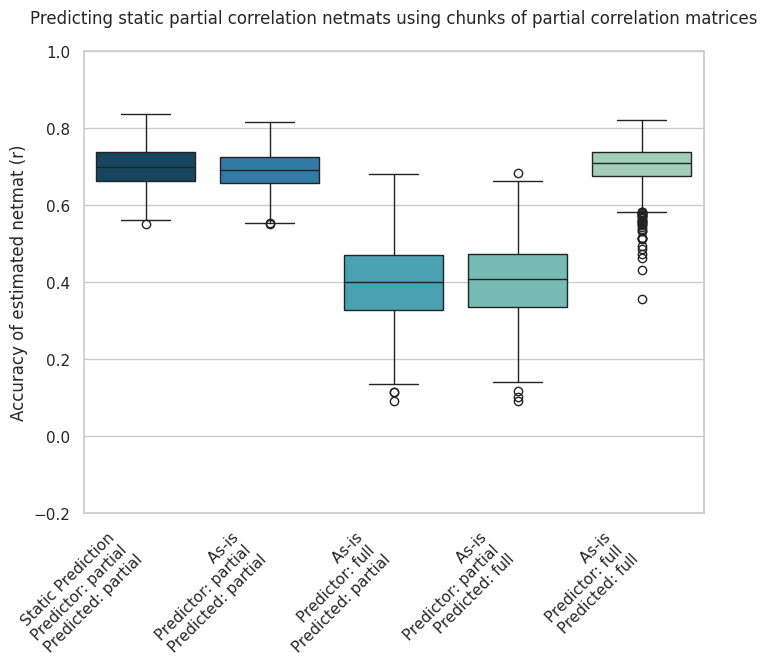

In [14]:
##################### Plot box plots of accuracies across HMM feature groups (across edges)  ########################

# transform array to list to make dataframe to pot as boxplots across edges
hmm_features_accuracy_list = []

for j in range(n_feat_type):
    hmm_features_accuracy_list.append(hmm_features_accuracy[j,:,:].flatten())

print(len(hmm_features_accuracy_list))
print(hmm_features_accuracy_list[0].shape)


# Create a dataframe with the data and group names
df = pd.DataFrame({'Group': np.repeat(labels, [hmm_features_accuracy_list[i].shape[0] for i in range(len(labels))]),
                   'Value': np.concatenate(hmm_features_accuracy_list)})

# Create the grouped boxplot using Seaborn
colors = ['#0B486B', '#1f7fb7', '#38adc3', '#6bc6bd', '#9ad6b8', '#c8e9b3', '#e1f5ca']
#colors = ['#0B486B', '#6bc6bd']
sns.set(style="whitegrid")
#sns.set(style="white")
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Group', y='Value', data=df, palette=colors)

# Set the x-axis and y-axis labels
plt.xlabel('')
plt.ylabel('Accuracy of estimated netmat (r)')

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ymin = -0.2  # Minimum y-value
ymax = 1  # Maximum y-value
ax.set_ylim(ymin, ymax)


# Set the title
plt.title("Predicting static partial correlation netmats using chunks of partial correlation matrices", fontsize=12, pad=20)

# Show the plot
plt.show()

In [15]:
# now load ???
static_dir = f"{proj_dir}/results/ICA_{n_ICs}/static"
partial_correlations_chunk = np.load(f"{static_dir}/partial_correlations_{n_chunk}_chunks.npy")
print(partial_correlations_chunk.shape)
partial_correlations_chunk_flatten = PartialCorrClass.extract_upper_off_main_diag(partial_correlations_chunk)
print(partial_correlations_chunk_flatten.shape)

predicted_edges_static = feature_prediction_dict['static_icov_icov']['predict_y']
print(partial_correlations_chunk_flatten.shape)
static_chunk_actual_flatten_mean = np.mean(partial_correlations_chunk_flatten, axis=0)
print(static_chunk_actual_flatten_mean.shape)
print(predicted_edges_static.shape)
predicted_edges_static_mean = np.mean(predicted_edges_static, axis=1)
print(predicted_edges_static_mean.shape)

print(ground_truth_icov_reshape_mean.shape)
ground_truth_icov_reshape_mean = ground_truth_icov_reshape_mean[0:n_edge]
print(ground_truth_icov_reshape_mean.shape)
print(static_chunk_actual_flatten_mean.shape)
static_chunk_actual_flatten_mean = static_chunk_actual_flatten_mean[:,0:n_edge]
print(static_chunk_actual_flatten_mean.shape)

(1003, 4, 25, 25)
(1003, 4, 300)
(1003, 4, 300)
(4, 300)
(4, 1003, 300)
(4, 300)
(300,)
(300,)
(4, 300)
(4, 300)


In [16]:
predicted_edges_static_mean.shape

(4, 300)

In [18]:
df_combined_mse_chunk_1 = df_combined_mse.loc[df_combined_mse['Group'] == 1]
print(df_combined_mse_chunk_1)
df_combined_mse_chunk_1_static = df_combined_mse_chunk_1.loc[df_combined_mse_chunk_1['Dataset'] == 'Static (prediction)']
print(df_combined_mse_chunk_1_static)

df_combined_mse_chunk_1_actual = df_combined_mse_chunk_1.loc[df_combined_mse_chunk_1['Dataset'] == 'Static (as-is)']
print(df_combined_mse_chunk_1_actual)

      Group       MSE              Dataset
0         1  1.121895       Static (as-is)
1         1  2.843147       Static (as-is)
2         1  2.582308       Static (as-is)
3         1  1.216107       Static (as-is)
4         1  1.224051       Static (as-is)
...     ...       ...                  ...
1495      1  0.494787  Static (prediction)
1496      1  0.360830  Static (prediction)
1497      1  0.506699  Static (prediction)
1498      1  0.376598  Static (prediction)
1499      1  0.403796  Static (prediction)

[600 rows x 3 columns]
      Group       MSE              Dataset
1200      1  0.471993  Static (prediction)
1201      1  1.674018  Static (prediction)
1202      1  1.542428  Static (prediction)
1203      1  0.455616  Static (prediction)
1204      1  0.532614  Static (prediction)
...     ...       ...                  ...
1495      1  0.494787  Static (prediction)
1496      1  0.360830  Static (prediction)
1497      1  0.506699  Static (prediction)
1498      1  0.376598  Static 

In [19]:
#df_combined_mse_chunk_1_actual.get(MSE)



In [20]:
print(df_combined_mse_chunk_1_static["MSE"].shape)

print(df_combined_mse_chunk_1_actual["MSE"].shape)



(300,)
(300,)


In [21]:
df_combined_mse_chunk_1_static["MSE"]

1200    0.471993
1201    1.674018
1202    1.542428
1203    0.455616
1204    0.532614
          ...   
1495    0.494787
1496    0.360830
1497    0.506699
1498    0.376598
1499    0.403796
Name: MSE, Length: 300, dtype: float64

In [22]:
# find the difference between the prediction and the ground truth for both the 'prediction' and 'actual' version

# static_prediction_MSE = df_combined_mse_chunk_1_static["MSE"]#.tolist() #(predicted_edges_static_mean[1,:] - ground_truth_icov_reshape_mean)**2
# static_actual_MSE = df_combined_mse_chunk_1_actual["MSE"]#.tolist() #(static_chunk_actual_flatten_mean[1,:] - ground_truth_icov_reshape_mean)**2
# #static_prediction_ASE = np.abs((predicted_edges_static_mean[1,:] - ground_truth_icov_reshape_mean))
# #static_actual_ASE = np.abs((static_chunk_actual_flatten_mean[1,:] - ground_truth_icov_reshape_mean))

# # find the difference between the 'prediction' MSE and the 'actual' MSE
# prediction_actual_MSE_diff = df_combined_mse_chunk_1_actual["MSE"] - df_combined_mse_chunk_1_static["MSE"]  #(static_actual_MSE - static_prediction_MSE)
# #prediction_actual_ASE_diff = (static_actual_ASE - static_prediction_ASE)

# Extract the values from the Series objects
static_prediction_MSE = df_combined_mse_chunk_1_static["MSE"].values
static_actual_MSE = df_combined_mse_chunk_1_actual["MSE"].values

# Perform element-wise subtraction
prediction_actual_MSE_diff = static_actual_MSE - static_prediction_MSE

#print(predicted_edges_static_mean.shape)
print(static_chunk_actual_flatten_mean.shape)
print(np.nansum(static_prediction_MSE)) # prediction is MUCH better than the 'actual'
print(np.nansum(static_actual_MSE))

# turn into a 25 x 25 matrix in order to plot more nicely
MSEs_array = np.zeros((3, n_ICs, n_ICs))
m, n = np.triu_indices(n_ICs, 1)
MSEs_array[0, m, n] = static_actual_MSE 
MSEs_array[0, n, m] = static_actual_MSE 
MSEs_array[1, m, n] = static_prediction_MSE 
MSEs_array[1, n, m] = static_prediction_MSE 
MSEs_array[2, m, n] = prediction_actual_MSE_diff 
MSEs_array[2, n, m] = prediction_actual_MSE_diff 

# ASEs_array = np.zeros((3, n_ICs, n_ICs))
# m, n = np.triu_indices(n_ICs, 1)
# ASEs_array[0, m, n] = static_actual_ASE 
# ASEs_array[0, n, m] = static_actual_ASE 
# ASEs_array[1, m, n] = static_prediction_ASE 
# ASEs_array[1, n, m] = static_prediction_ASE 
# ASEs_array[2, m, n] = prediction_actual_ASE_diff 
# ASEs_array[2, n, m] = prediction_actual_ASE_diff 

(4, 300)
203.27341752181562
424.1920010866297


In [23]:
# Define the brain networks
if n_ICs == 25:
    brain_networks = ['VIS', 'VIS', 'VIS', 'DM', 'FP', 'VAT', 'DM', 'DM', 'VIS', 'FP',
                    'FP', 'ATT', 'SSM', 'VIS', 'AUD', 'DAT', 'EC', 'ATT', 'DM',
                    'EC', 'SSM', 'CB', 'SN', 'THAL', 'BG']
elif n_ICs == 50:
    brain_networks = ['VIS', 'VIS', 'VIS', 'DM', 'FP', 'VAT', 'DM', 'DM', 'VIS', 'FP',
                    'FP', 'ATT', 'SSM', 'VIS', 'AUD', 'DAT', 'EC', 'ATT', 'DM',
                    'EC', 'SSM', 'CB', 'SN', 'THAL', 'BG',
                    'VIS', 'VIS', 'VIS', 'DM', 'FP', 'VAT', 'DM', 'DM', 'VIS', 'FP',
                    'FP', 'ATT', 'SSM', 'VIS', 'AUD', 'DAT', 'EC', 'ATT', 'DM',
                    'EC', 'SSM', 'CB', 'SN', 'THAL', 'BG']


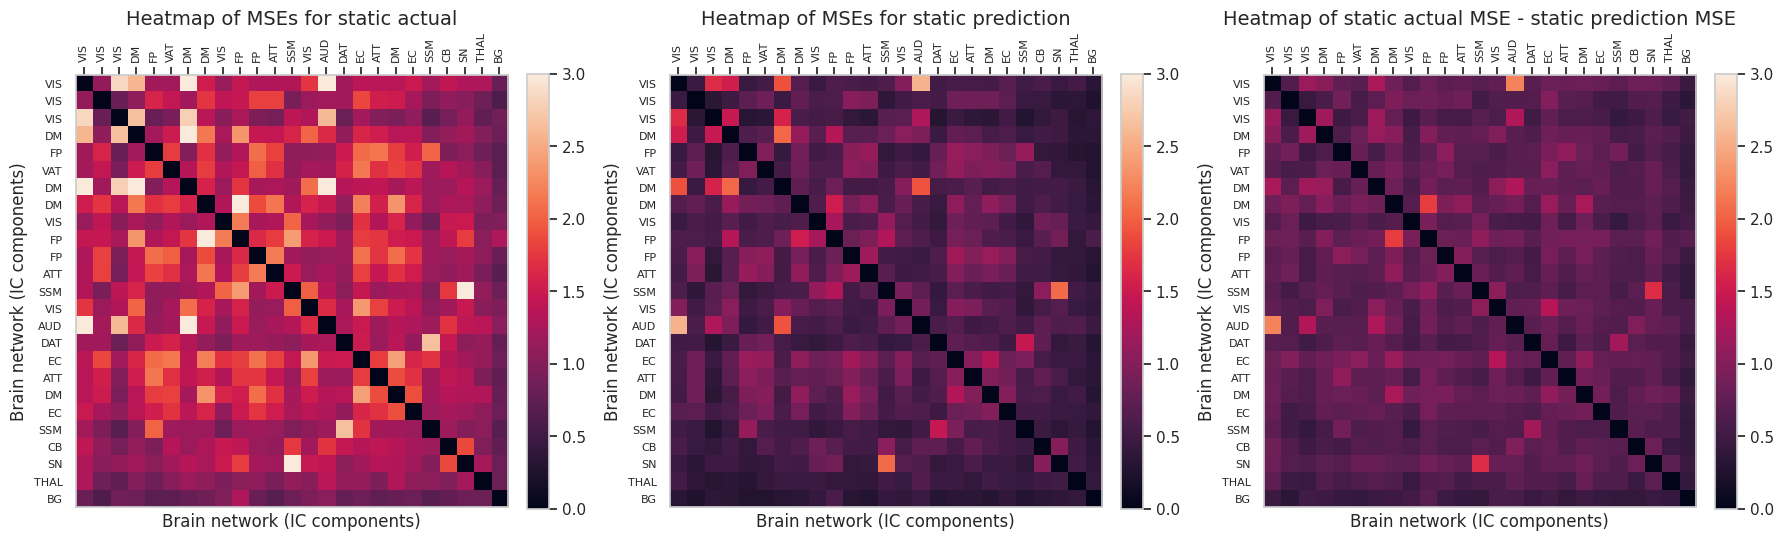

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

titles = [
    "Heatmap of MSEs for static actual",
    "Heatmap of MSEs for static prediction",
    "Heatmap of static actual MSE - static prediction MSE"
]

for i in range(3):
    # Create the heatmap
    heatmap = axs[i].imshow(MSEs_array[i,:,:], vmin = 0,  cmap='rocket', vmax = 3)

    # Remove the grey grid lines
    axs[i].grid(False)

    # Add a colorbar
    cbar = fig.colorbar(heatmap, ax=axs[i], orientation='vertical', fraction=0.046, pad=0.04)

    # Set the x-axis and y-axis labels as "Brain networks"
    axs[i].set_xlabel("Brain network (IC components)", fontsize=12)
    axs[i].set_ylabel("Brain network (IC components)", fontsize=12)

    # Set the x-axis and y-axis tick positions and labels
    axs[i].set_xticks(range(n_ICs))
    axs[i].set_yticks(range(n_ICs))
    axs[i].set_xticklabels(brain_networks, fontsize=8, rotation=90)
    axs[i].set_yticklabels(brain_networks, fontsize=8)

    # Move the x-axis tick labels to the top
    axs[i].xaxis.set_ticks_position('top')

    # Set the title
    axs[i].set_title(titles[i], fontsize=14)

# Adjust layout to make room for the colorbars
plt.tight_layout()
plt.show()

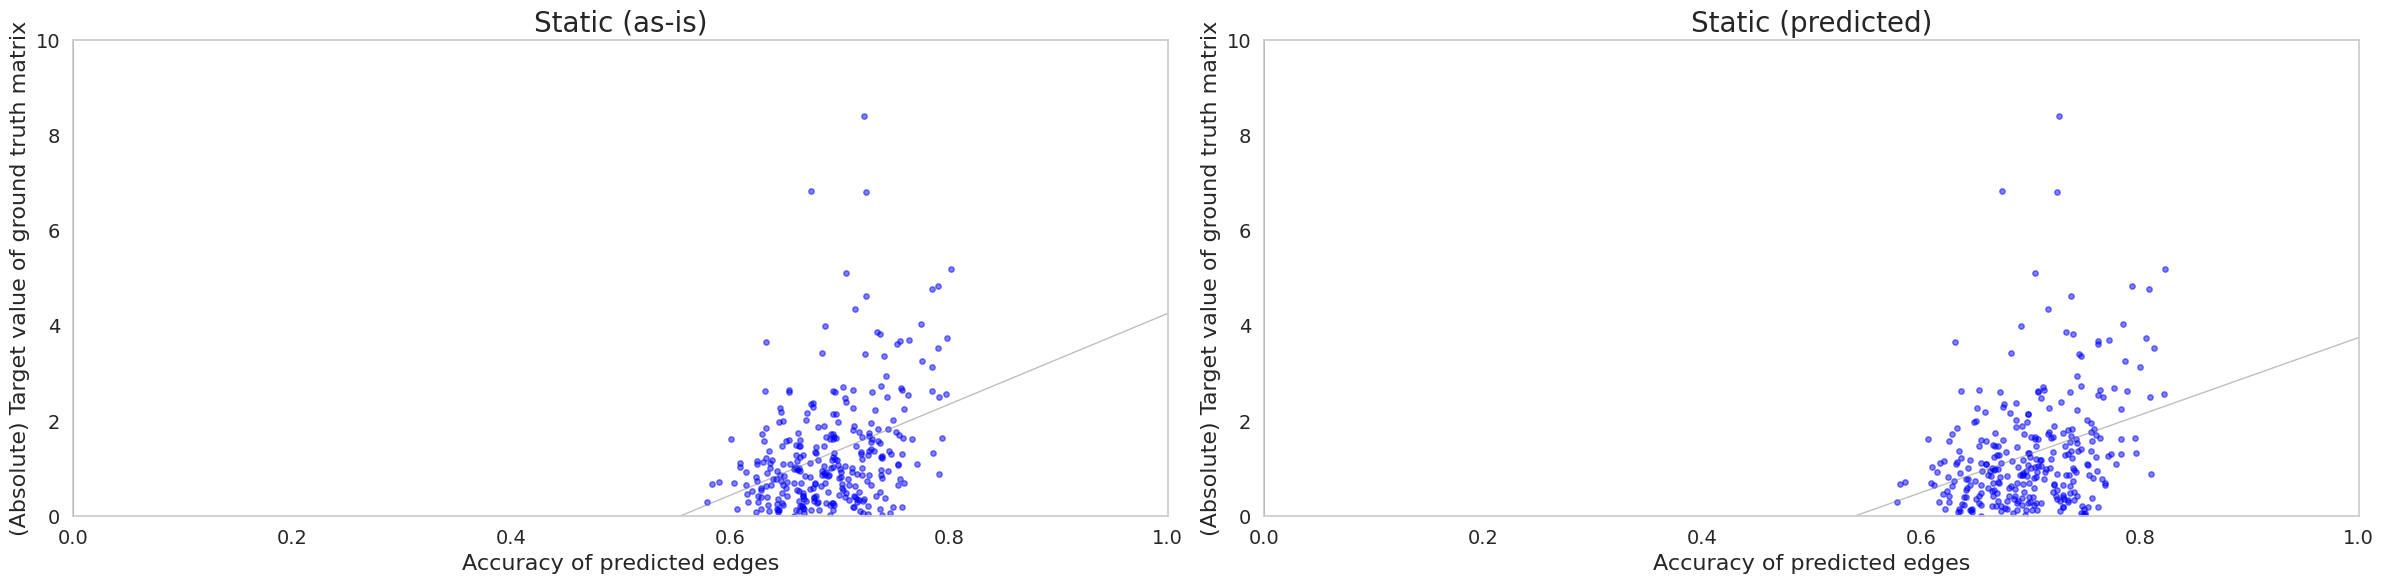

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming feature_prediction_dict and ground_truth_icov_reshape_mean are already defined

# Define the different x datasets
x_actual = np.mean(feature_prediction_dict['actual_icov_icov']['accuracy_per_edge'], axis=0)
x_static = np.mean(feature_prediction_dict['static_icov_icov']['accuracy_per_edge'], axis=0)
#x_fc = np.mean(feature_prediction_dict['fc']['accuracy_per_edge'], axis=0)

y = np.abs(ground_truth_icov_reshape_mean)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 6))  # 1 row, 3 columns

# List of x datasets and titles for each subplot
x_data = [x_actual, x_static]  # , x_fc]
titles = ['Static (as-is)', 'Static (predicted)']  # , 'FC']

for ax, x, title in zip(axes, x_data, titles):
    # Create the scatter plot
    ax.scatter(x, y, color='blue', alpha=0.5, s=15)  # Set the color and transparency

    # Add black lines on x and y axes
    ax.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
    ax.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0

    # Set plot title and labels
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Accuracy of predicted edges', fontsize=16)
    ax.set_ylabel('(Absolute) Target value of ground truth matrix', fontsize=16)

    # Set axes limits
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 10])

    # Set tick parameters
    ax.tick_params(axis='both', which='major', labelsize=14)

    # Hide the grid
    ax.grid(False)

    # Fit linear regression via least squares with numpy.polyfit
    b, a = np.polyfit(x, y, deg=1)

    # Create sequence of 100 numbers from 0 to 10
    xseq = np.linspace(0, 10, num=100)

    #ax.axvline(x=0.6, color='black', linestyle='-', linewidth=3)

    # Plot regression line
    ax.plot(xseq, a + b * xseq, color="grey", lw=1, alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


dict_keys(['static_icov_icov', 'actual_icov_icov', 'actual_icov_cov', 'actual_cov_icov', 'actual_cov_cov'])
(4, 300)
(4, 300)
(3, 25, 25)
(3, 300)
(300,)


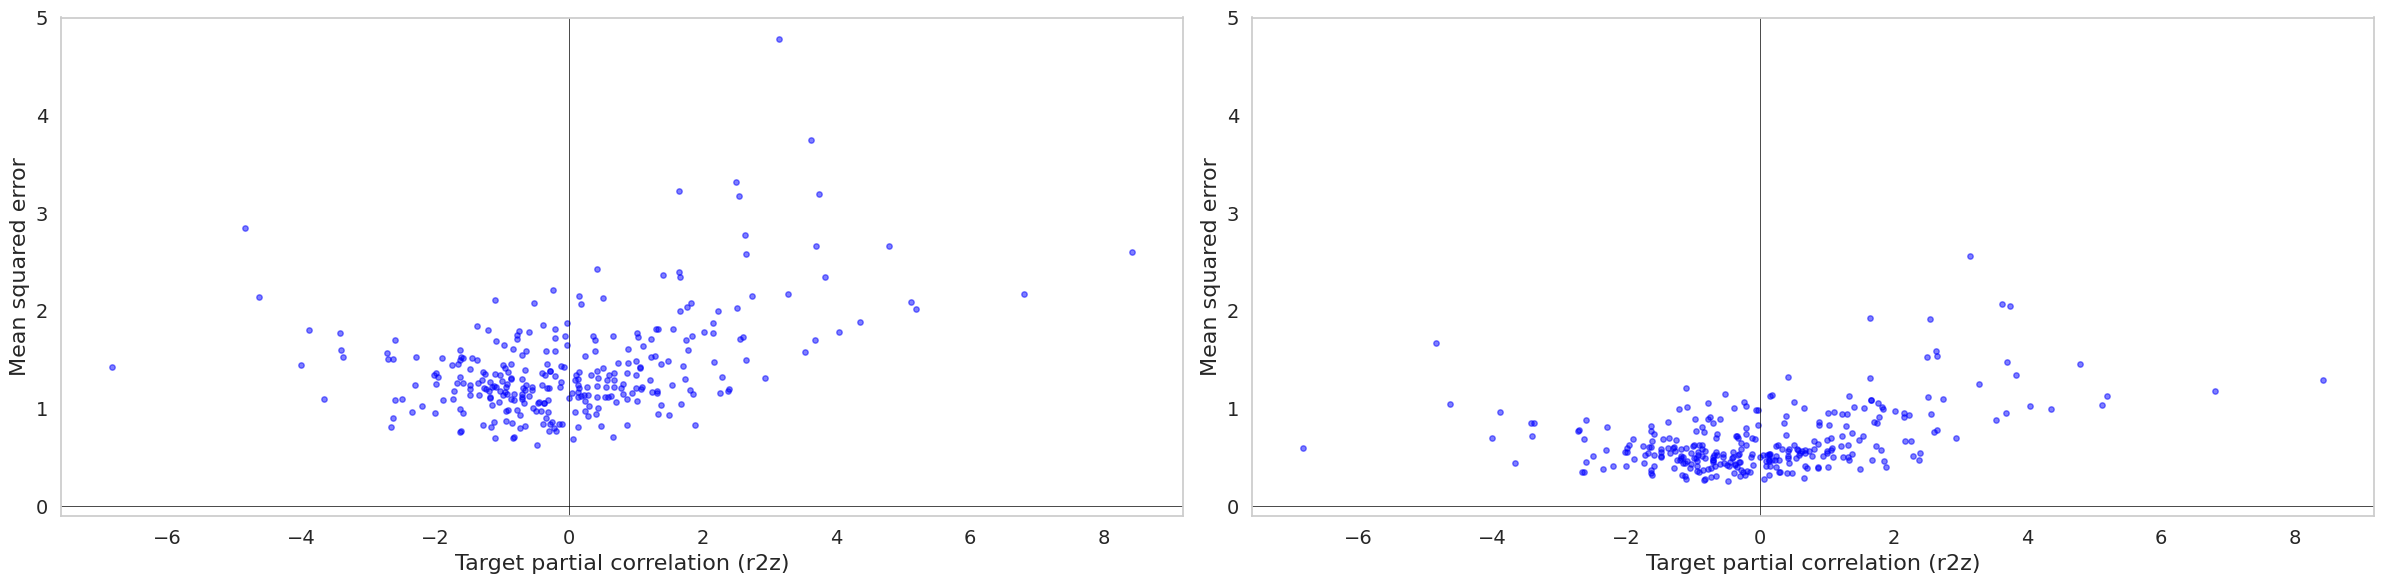

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming MSEs_array_reshape and ground_truth_icov_reshape_mean are defined as in your code
print(feature_prediction_dict.keys())
print(feature_prediction_dict['static_icov_icov']['accuracy_per_edge'].shape)
print(feature_prediction_dict['actual_icov_icov']['accuracy_per_edge'].shape)
print(MSEs_array.shape)
MSEs_array_reshape = MSEs_array[..., m, n]  # flatten covs
#ASEs_array_reshape = ASEs_array[..., m, n]  # flatten covs
print(MSEs_array_reshape.shape)
print(ground_truth_icov_reshape_mean.shape)

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 6))  # 1 row, 2 columns

for j in range(2):
    x = ground_truth_icov_reshape_mean
    y = MSEs_array_reshape[j, :]

    # Create the scatter plot in the j-th subplot
    ax = axes[j]
    ax.scatter(x, y, color='blue', alpha=0.5, s=15)  # Set the color and transparency

    # Add black lines on x and y axes
    ax.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
    ax.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0

    # Set plot title and labels with increased font size
    #ax.set_title(f"Plot {j + 1} Title", fontsize=20)  # Replace with appropriate title
    ax.set_xlabel('Target partial correlation (r2z)', fontsize=16)
    ax.set_ylabel('Mean squared error', fontsize=16)
    
    # Set the y-axis limits
    ax.set_ylim(-0.1, 5)

    # Set tick parameters
    ax.tick_params(axis='both', which='major', labelsize=14)

    # Hide the grid
    ax.grid(False)

# Show the figure
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


In [27]:
print(static_chunk_actual_flatten_mean.shape)
print(predicted_edges_static_mean.shape)
#print(predicted_edges_fc_mean.shape)

(4, 300)
(4, 300)


(4, 10, 300, 300)
(300,)


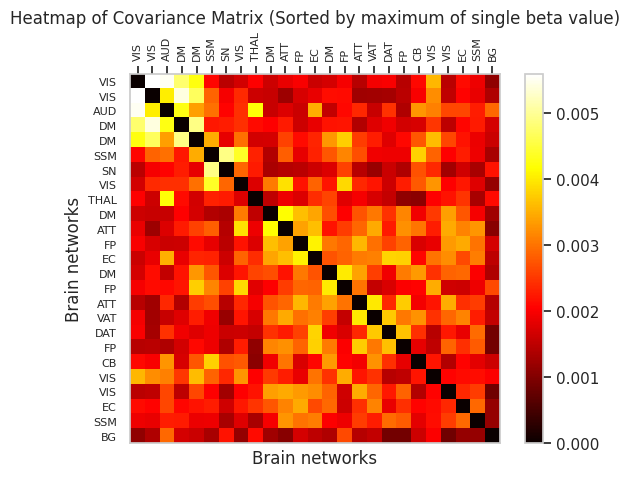

In [28]:
################### Heatmap of betas for static predictions ###################

# note betas then reshape for plot
betas_static = feature_prediction_dict['static_icov_icov']['beta']
print(betas_static.shape)
betas_static_mean = np.mean(np.mean(np.mean(betas_static, axis = 0), axis = 0), axis = 0)
print(betas_static_mean.shape)
betas_static_mean_reshape = np.zeros((n_ICs, n_ICs))
m, n = np.triu_indices(n_ICs, 1)
betas_static_mean_reshape[m, n] = betas_static_mean
betas_static_mean_reshape[n, m] = betas_static_mean

# Calculate the maximum values of each row
row_max_values = np.max(betas_static_mean_reshape, axis=1)

# Get the sorting indices based on the maximum values
sorting_indices = np.argsort(row_max_values)[::-1]

# Reorder the covariance matrix and brain networks based on the sorting indices
betas_static_mean_reshape_sorted = betas_static_mean_reshape[sorting_indices][:, sorting_indices]
brain_networks_sorted = [brain_networks[i] for i in sorting_indices]

# Create a new figure
fig, ax = plt.subplots()

# Create the heatmap
heatmap = ax.imshow(betas_static_mean_reshape_sorted, cmap='hot')

# Remove the grey grid lines
ax.grid(False)

# Add a colorbar
cbar = plt.colorbar(heatmap)

# Set the x-axis and y-axis labels as "Brain networks"
ax.set_xlabel("Brain networks", fontsize=12)
ax.set_ylabel("Brain networks", fontsize=12)

# Set the x-axis and y-axis tick positions and labels
ax.set_xticks(range(n_ICs))
ax.set_yticks(range(n_ICs))
ax.set_xticklabels(brain_networks_sorted, fontsize=8, rotation=90)
ax.set_yticklabels(brain_networks_sorted, fontsize=8)

# Move the x-axis tick labels to the top
ax.xaxis.set_ticks_position('top')

# Set the title
plt.title("Heatmap of Covariance Matrix (Sorted by maximum of single beta value)")

# Show the figure
plt.show()

In [29]:
# # interleave columns of data and then remove NaNs
accuracy_per_edge = predicted_edges_static_mean
accuracy_per_edge_actual_1 = static_chunk_actual_flatten_mean


row_a, col_a = np.shape(accuracy_per_edge_actual_1)
row_b, col_b = np.shape(accuracy_per_edge)
accuracy_interleave = np.ravel([accuracy_per_edge_actual_1, accuracy_per_edge],order="F").reshape(col_a,row_a+row_b).T
print(accuracy_interleave.shape)
accuracy_interleave_clean = accuracy_interleave[:, ~np.isnan(accuracy_interleave).any(axis=0)]
print(accuracy_interleave_clean.shape)

(8, 300)
(8, 300)


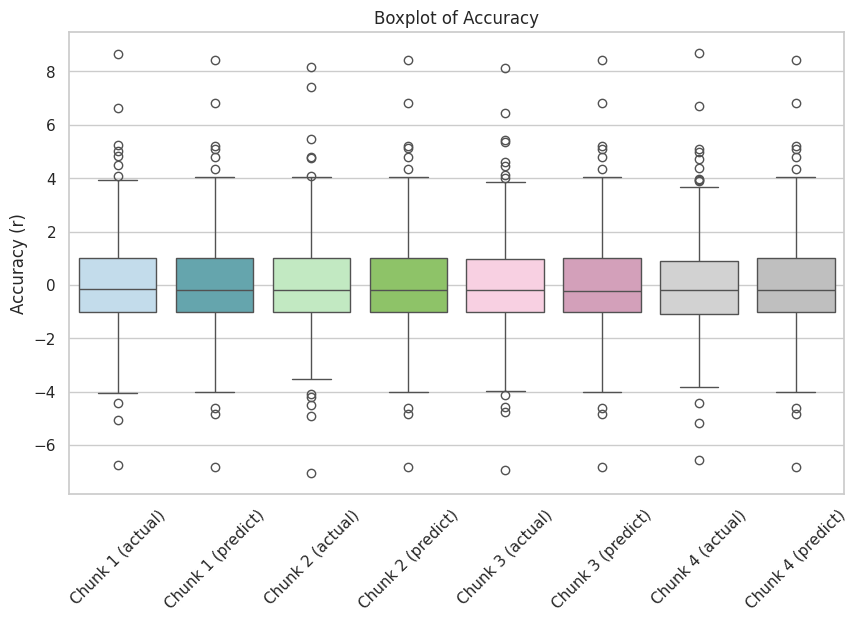

In [30]:
# Assuming you have accuracy_interleave defined

# Create labels for the boxplot
if n_chunk == 4:
    labels = ['Chunk 1 (actual)','Chunk 1 (predict)','Chunk 2 (actual)','Chunk 2 (predict)','Chunk 3 (actual)','Chunk 3 (predict)','Chunk 4 (actual)','Chunk 4 (predict)']
elif n_chunk == 12:
    labels = ['Chunk 1 (actual)','Chunk 1 (predict)','Chunk 2 (actual)','Chunk 2 (predict)','Chunk 3 (actual)','Chunk 3 (predict)','Chunk 4 (actual)','Chunk 4 (predict)',
                'Chunk 5 (actual)','Chunk 5 (predict)','Chunk 6 (actual)','Chunk 6 (predict)','Chunk 7 (actual)','Chunk 7 (predict)','Chunk 8 (actual)','Chunk 8 (predict)',
                'Chunk 9 (actual)','Chunk 9 (predict)','Chunk 10 (actual)','Chunk 10 (predict)','Chunk 11 (actual)','Chunk 11 (predict)','Chunk 12 (actual)','Chunk 12 (predict)']

# Define custom colors for the boxplot using RGBA tuples
colors = [(0.737, 0.867, 0.949), (0.349, 0.686, 0.725), (0.737, 0.937, 0.737), (0.549, 0.824, 0.349), (1, 0.788, 0.882), (0.859, 0.596, 0.729), (0.824, 0.824, 0.824), (0.749, 0.749, 0.749)]


# Create the boxplot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=accuracy_interleave_clean.T, palette=colors)

# Set plot title and labels
plt.title('Boxplot of Accuracy')
plt.ylabel('Accuracy (r)')

# Rotate x-axis labels by 45 degrees
plt.xticks(range(len(labels)), labels, rotation=45)

# Show the plot
plt.show()



In [31]:
# prepare betas for plot
betas_static = feature_prediction_dict['static_icov_icov']['beta']
print(betas_static.shape)
betas_static_mean = np.mean(betas_static, axis = 1)
print(betas_static_mean.shape)

static_betas_mean_self_predict = np.zeros((n_chunk, n_edge))
for chunk in range(n_chunk):
    static_betas_mean_self_predict[chunk,:] = np.diag(betas_static_mean[chunk,:,:])


mask = ~np.eye(betas_static_mean.shape[1], dtype=bool)

non_diagonal_elements = np.zeros((n_chunk, n_edge*n_edge - n_edge))

# Use the mask to extract non-diagonal elements
for chunk in range(n_chunk):
    non_diagonal_elements[chunk,:] = betas_static_mean[chunk,mask]

print(static_betas_mean_self_predict.shape)
print(non_diagonal_elements.shape)

(4, 10, 300, 300)
(4, 300, 300)
(4, 300)
(4, 89700)


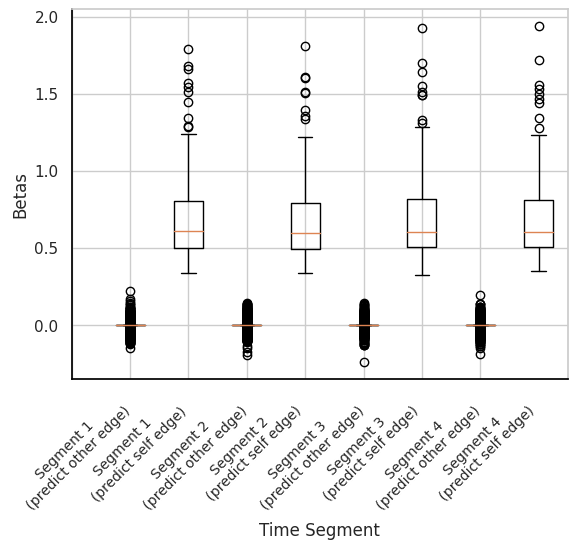

In [32]:
# Create an empty list to store the combined data for plotting
combined_data = []

# Iterate over each row in 'non_diagonal_elements' and corresponding row in 'static_betas_mean_self_predict'
for i in range(n_chunk):
    # Add the first 105300 values from 'non_diagonal_elements'
    non_diagonal_elements_clean = non_diagonal_elements[i][~np.isnan(non_diagonal_elements[i])]
    combined_data.append(non_diagonal_elements_clean)
    # Add the corresponding row from 'static_betas_mean_self_predict'
    static_betas_mean_self_predict_clean = static_betas_mean_self_predict[i][~np.isnan(static_betas_mean_self_predict[i])]
    combined_data.append(static_betas_mean_self_predict_clean)

# Create a boxplot

plt.boxplot(combined_data)

# Set labels for x-axis ticks
if n_chunk == 4:
    labels = ['Segment 1 \n (predict other edge)', 'Segment 1 \n  (predict self edge)', 'Segment 2 \n (predict other edge)', 'Segment 2 \n (predict self edge)', 
                                'Segment 3 \n (predict other edge)', 'Segment 3 \n (predict self edge)', 'Segment 4 \n (predict other edge)', 'Segment 4 \n (predict self edge)']
elif n_chunk == 12:
    labels = ['1 (other)', '1 (self)', '2 (other)', '2 (self)', 
              '3 (other)', '3 (self)', '4 (other)', '4 (self)',
              '5 (other)', '5 (self)', '6 (other)', '6 (self)', 
              '7 (other)', '7 (self)', '8 (other)', '8 (self)',
              '9 (other)', '9 (self)', '10 (other)', '10 (self)', 
              '11 (other)', '11 (self)', '12 (other)', '12 (self)']

plt.xticks(np.arange(1, 2*n_chunk+1)-1, labels, fontsize=10)

plt.xticks(rotation=45)

# Set labels for y-axis and title
plt.ylabel('Betas')
plt.xlabel('Time Segment')
#plt.title('Boxplot of Non-Diagonal Elements and Static Betas')

# Set the color of the spines to black
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

# Show the plot
plt.show()